In [1]:
from tensorflow import keras
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential
import numpy as np

In [2]:
data = mnist.load_data()

In [3]:
(xtrain, ytrain), (xtest, ytest) = data

In [5]:
ytrain.shape

(60000,)

In [5]:
xtrain.shape, xtest.shape

((60000, 28, 28), (10000, 28, 28))

In [7]:
xtrain_input = xtrain.reshape(xtrain.shape[0], xtrain.shape[1]*xtrain.shape[2])
yencoded = keras.utils.to_categorical(ytrain)

In [8]:
yencoded.shape

(60000, 10)

In [7]:
model = Sequential(
    [
        Dense(128, input_shape=(xtrain_input.shape[1], ), activation='tanh'),
        Dense(64, activation='relu'),
        Dense(16, activation='relu'),
        Dense(10, activation='softmax'),
    ]
)

In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
model.fit(xtrain_input, yencoded, epochs=50, batch_size=256)

Epoch 1/50
235/235 [==============================] - 5s 9ms/step - loss: 0.7961 - accuracy: 0.7396
Epoch 2/50
235/235 [==============================] - 2s 9ms/step - loss: 0.3763 - accuracy: 0.8846
Epoch 3/50
235/235 [==============================] - 2s 7ms/step - loss: 0.3279 - accuracy: 0.8997
Epoch 4/50
235/235 [==============================] - 2s 7ms/step - loss: 0.3012 - accuracy: 0.9077
Epoch 5/50
235/235 [==============================] - 2s 8ms/step - loss: 0.2858 - accuracy: 0.9115
Epoch 6/50
235/235 [==============================] - 2s 7ms/step - loss: 0.2719 - accuracy: 0.9146
Epoch 7/50
235/235 [==============================] - 2s 9ms/step - loss: 0.2554 - accuracy: 0.9208
Epoch 8/50
235/235 [==============================] - 2s 7ms/step - loss: 0.2356 - accuracy: 0.9268
Epoch 9/50
235/235 [==============================] - 2s 7ms/step - loss: 0.2319 - accuracy: 0.9265
Epoch 10/50
235/235 [==============================] - 2s 8ms/step - loss: 0.2264 - accuracy: 0.9287

In [10]:
model.evaluate(xtest.reshape(xtest.shape[0], xtest.shape[1]*xtest.shape[2]), keras.utils.to_categorical(ytest))

313/313 [==============================] - 2s 4ms/step - loss: 0.1570 - accuracy: 0.9513


[0.15700848400592804, 0.9513000249862671]

In [11]:
from sklearn.metrics import confusion_matrix


# confusion_matrix(keras.utils.to_categorical(ytest), model.predict(xtest.reshape(xtest.shape[0], xtest.shape[1]*xtest.shape[2])).round())

In [12]:
ypredict = keras.utils.to_ordinal(model.predict(xtrain_input).round())

1875/1875 [==============================] - 8s 4ms/step


In [13]:
import tensorflow as tf
label = tf.argmax(model.predict(xtrain_input).round(), axis=1)

1875/1875 [==============================] - 8s 4ms/step


In [14]:
label_pred = label.numpy()

In [15]:
cf = confusion_matrix(ytrain, label_pred)

In [16]:
sum = 0
for i in range (0, 10):
    sum+=cf[i][i]

In [17]:
accuracy = (sum/(cf.sum()))*100

In [18]:
accuracy

95.43166666666667

In [19]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


lda_model = LinearDiscriminantAnalysis()
lda_model_fit = lda_model.fit(xtrain_input, ytrain)

In [20]:
lda_pred = lda_model_fit.predict(xtest.reshape(xtest.shape[0], xtest.shape[1]*xtest.shape[2]))

In [21]:
cf2 = confusion_matrix(ytest, lda_pred)

In [22]:
sum2 = 0
for i in range (0, 10):
    sum2+=cf2[i][i]

In [23]:
sum2/cf2.sum()

0.873

In [24]:
a = np.array([[1, 2, 3], [4, 5, 6]])

In [25]:
a.reshape(3, 2)

array([[1, 2],
       [3, 4],
       [5, 6]])

In [26]:
a

array([[1, 2, 3],
       [4, 5, 6]])

In [33]:
from sklearn.decomposition import PCA


pca = PCA(n_components=300)
model_pca = pca.fit(xtrain_input, ytrain)

In [67]:
eigenfaces = model_pca.components_
model_pca.explained_variance_ratio_

array([0.09704664, 0.07095924, 0.06169089, 0.05389419, 0.04868797,
       0.04312231, 0.0327193 , 0.02883895, 0.02762029, 0.02357001,
       0.0210919 , 0.02022991, 0.01715818, 0.01692111, 0.01578641,
       0.01482953, 0.01324561, 0.01276897, 0.01187263, 0.01152684,
       0.01066166, 0.01006713, 0.00953573, 0.00912544, 0.00883405,
       0.00839319, 0.00812579, 0.00786366, 0.00744733, 0.00690859,
       0.00658094, 0.00648148, 0.00602615, 0.00586582, 0.00570021,
       0.00543628, 0.00505786, 0.00487859, 0.00481429, 0.00472266,
       0.00456747, 0.00444836, 0.00418501, 0.00398215, 0.00384975,
       0.00375103, 0.00362009, 0.00351591, 0.00340058, 0.00321874,
       0.00319017, 0.00312805, 0.00295983, 0.00288955, 0.0028413 ,
       0.00271436, 0.00269521, 0.00258473, 0.00253771, 0.00244781,
       0.00240506, 0.00239263, 0.00230408, 0.00221532, 0.00213721,
       0.00207225, 0.00203043, 0.00196783, 0.00192853, 0.00188632,
       0.00186977, 0.00181083, 0.00177562, 0.00174898, 0.00165

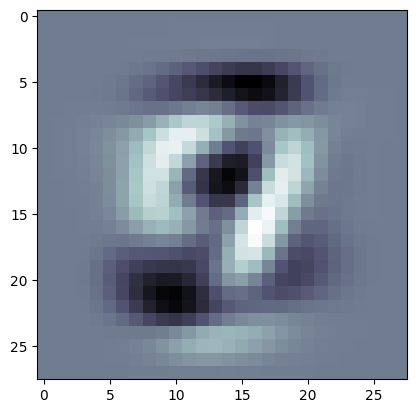

In [71]:
import matplotlib.pyplot as plt

plt.imshow(model_pca.components_[1].reshape(28, 28), cmap=plt.bone())

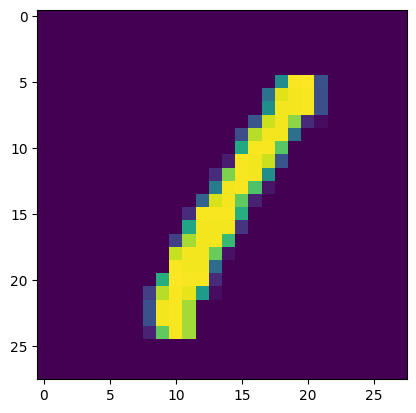

In [60]:
plt.imshow(xtrain[3])